In [1]:
import glob
from PIL import Image
import numpy as np
import os

SIZE = (256,256) #resize images
train_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/*'
val_dir   = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/*'
test_dir  = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_test/*'

def capture_into_list(data_dir):
    images = []
    labels = []
    for directory_path in glob.glob(data_dir):
        label = directory_path.split(os.path.sep)[-1]
        print(label)
        for img_path in glob.glob(os.path.join(directory_path, "*.png")):
            print(img_path)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(SIZE, Image.Resampling.BILINEAR)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [3]:
train_images, train_labels = capture_into_list(train_dir)

Garland Pose
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_64_0.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_21_0.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_4_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_40_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_23_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_66_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train/Garland Pose/Garland Pose_59_0.png
/Users/harrynguyen/Documents/

In [4]:
train_images.shape, train_labels.shape

((11874, 256, 256, 3), (11874,))

In [5]:
val_images, val_labels = capture_into_list(val_dir)
test_images, test_labels = capture_into_list(test_dir)

Garland Pose
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_38_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_29_original.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_38_0.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_21_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_4_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_60_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val/Garland Pose/Garland Pose_44_1.png
/Users/harrynguyen/Documents/GitHub/

In [6]:
val_images.shape, val_labels.shape

((2547, 256, 256, 3), (2547,))

In [7]:
test_images.shape, test_labels.shape

((2594, 256, 256, 3), (2594,))

In [8]:
#Encode label from text to integer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(val_labels)
val_labels_encoded = le.transform(val_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [9]:
print("Original train labels:", train_labels[1000:1050])
print("Encoded train labels:", train_labels_encoded[1000:1050])

print("Original validation labels:", val_labels[:-5])
print("Encoded validation labels:", val_labels_encoded[:-5])

print("Original test labels:", test_labels[:-5])
print("Encoded test labels:", test_labels_encoded[:-5])


Original train labels: ['Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose'
 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose' 'Child Pose']
Encoded train labels: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8]
Original validation labels: ['Garland Pose' 'Garland Pose' 'Garland Pose' ... 'Pigeon Pose'
 'Pigeon Pose' 'Pigeon Pose']
Encoded validation labels: [33 33 33 ... 55 55 55]
Original test labe

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test = train_images, train_labels_encoded, val_images, val_labels_encoded, test_images, test_labels_encoded

#scale the pixels value to between 0 and 1
x_train, x_val, x_test = x_train/255.0, x_val/255.0, x_test/255.0

In [11]:
print(x_train.mean())#the mean now should be 256 times less than

0.009341119446321022


In [12]:
from keras.api.applications.vgg16 import VGG16
########Build Pre-trained Model vgg16
SIZE = 256
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

2024-08-10 14:12:43.565761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
VGG_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
for layer in VGG_model.layers:
    layer.trainable = False

VGG_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
def extract_features(model, data):
    features = model.predict(data)
    features = features.reshape(features.shape[0], -1)
    return features

In [25]:
x_train_RF = extract_features(VGG_model, x_train)

372/372 ━━━━━━━━━━━━━━━━━━━━ 4953s 13s/step


In [26]:
x_train_RF.shape

(11874, 32768)

In [27]:
print(x_train_RF[:-5])

[[0.1387448  0.         0.         ... 0.         0.6936425  0.        ]
 [0.05919549 0.         0.         ... 0.         0.6846705  0.        ]
 [0.08553793 0.         0.         ... 0.         0.6758144  0.        ]
 ...
 [0.05919549 0.         0.         ... 0.         0.68081546 0.        ]
 [0.05919549 0.         0.         ... 0.         0.6790884  0.        ]
 [0.07474191 0.         0.         ... 0.         0.67605    0.        ]]


In [28]:
features2_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/features/features_2'
x_train_RF_2_dir = os.path.join(features2_dir, 'x_train_RF_2.npy')
np.save(x_train_RF_2_dir, x_train_RF)

In [29]:
x_val_rf = extract_features(VGG_model, x_val)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1063s 13s/step


In [30]:
x_val_rf.shape

(2547, 32768)

In [31]:
print(x_val_rf[:-5])

[[0.05919549 0.         0.         ... 0.         0.6742503  0.        ]
 [0.05919549 0.         0.         ... 0.         0.6693889  0.        ]
 [0.06062335 0.         0.         ... 0.         0.6695808  0.        ]
 ...
 [0.05917971 0.         0.         ... 0.         0.6707344  0.        ]
 [0.05919455 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05923167 0.         0.         ... 0.         0.6706504  0.        ]]


In [32]:
features2_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/features/features_2'
x_val_RF_2_dir = os.path.join(features2_dir, 'x_val_RF_2.npy')
np.save(x_val_RF_2_dir, x_val_rf)

In [33]:
x_test_rf = extract_features(VGG_model, x_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1099s 13s/step


In [34]:
x_test_rf.shape

(2594, 32768)

In [35]:
print(x_test_rf[:-5])

[[0.05919549 0.         0.         ... 0.         0.6710638  0.        ]
 [0.05920033 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05901615 0.         0.         ... 0.         0.69464326 0.        ]
 ...
 [0.05919549 0.         0.         ... 0.         0.6694066  0.        ]
 [0.05904049 0.         0.         ... 0.         0.6693918  0.        ]
 [0.06925284 0.         0.         ... 0.         0.6693889  0.        ]]


In [36]:
features2_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/features/features_2'
x_test_RF_2_dir = os.path.join(features2_dir, 'x_test_RF_2.npy')
np.save(x_test_RF_2_dir, x_test_rf)

### Random Forest Train

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100, random_state=42)

In [18]:
features2_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/features/features_2'
x_train_RF_2_dir = os.path.join(features2_dir, 'x_train_RF_2.npy')
x_train_RF = np.load(x_train_RF_2_dir)

In [19]:
RF_model.fit(x_train_RF, y_train)

RandomForestClassifier(random_state=42)

In [20]:
train_prediction_RF = RF_model.predict(x_train_RF)

In [21]:
le.fit(train_labels)
train_prediction_RF = le.inverse_transform(train_prediction_RF)

In [22]:
from sklearn import metrics
print("Train Accuracy = ", metrics.accuracy_score(train_labels, train_prediction_RF))

Train Accuracy =  0.9997473471450228


<Axes: >

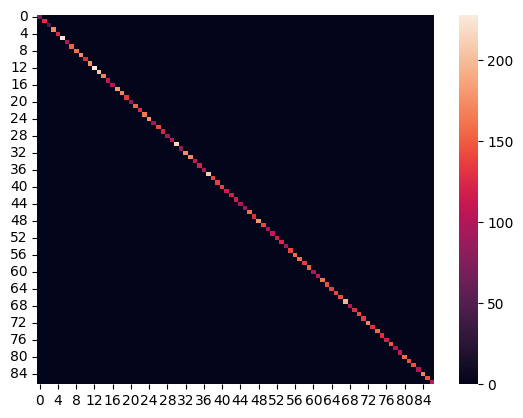

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_train = confusion_matrix(train_labels, train_prediction_RF)
sns.heatmap(cm_train, annot=False)

In [43]:
print(train_prediction_RF[:-5])

['Garland Pose' 'Garland Pose' 'Garland Pose' ... 'Pigeon Pose'
 'Pigeon Pose' 'Pigeon Pose']


In [24]:
features2_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/features/features_2'
x_val_RF_2_dir = os.path.join(features2_dir, 'x_val_RF_2.npy')
x_val_rf = np.load(x_val_RF_2_dir)

In [25]:
val_prediction_RF = RF_model.predict(x_val_rf)

In [26]:
le.fit(val_labels)
val_prediction_RF = le.inverse_transform(val_prediction_RF)

In [27]:
from sklearn import metrics
print("Val Accuracy = ", metrics.accuracy_score(val_labels, val_prediction_RF))

Val Accuracy =  0.3985080486847271


<Axes: >

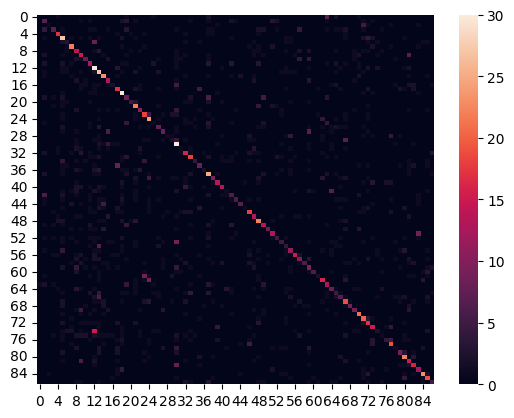

In [28]:
cm_train = confusion_matrix(val_labels, val_prediction_RF)
sns.heatmap(cm_train, annot=False)

In [29]:
features2_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/features/features_2'
x_test_RF_2_dir = os.path.join(features2_dir, 'x_test_RF_2.npy')
x_test_rf = np.load(x_test_RF_2_dir)

In [30]:
test_prediction_RF = RF_model.predict(x_test_rf)

In [31]:
test_prediction_RF = le.inverse_transform(test_prediction_RF)

In [32]:
print("Test Accuracy = ", metrics.accuracy_score(test_labels, test_prediction_RF))

Test Accuracy =  0.4009252120277564


<Axes: >

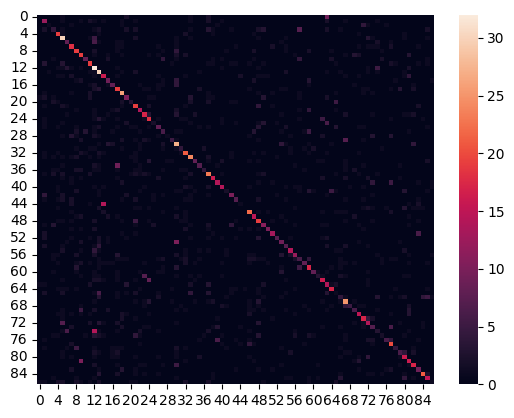

In [33]:
cm_train = confusion_matrix(test_labels, test_prediction_RF)
sns.heatmap(cm_train, annot=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
The prediction for this image is:  ['Upward Plank Pose']
The actual label for this image is:  Downward Dog Pose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
The prediction for this image is:  ['Cow Pose']
The actual label for this image is:  Two-Legged Inverted Staff Pose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
The prediction for this image is:  ['High Lunge']
The actual label for this image is:  High Lunge
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
The prediction for this image is:  ['Camel Pose']
The actual label for this image is:  Seated Forward Bend
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
The prediction for this image is:  ['Peacock Pose']
The actual label for this image is:  Peacock Pose
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
The prediction for this image is:  ['Shoulder Pressing Pose']
The actual label for this image is:  Embryo Pose
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
The prediction for this image is:  ['Bharadvajas Twist']
The actual label for thi

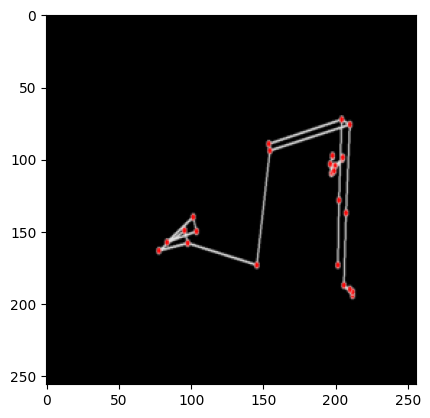

In [35]:
#Check results on a few select images
import matplotlib.pyplot as plt

for i in range (10):
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature=VGG_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0] 
    prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", test_labels[n])